In [1]:
#using ML approch
#binary classificarion on given 2 questions 

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

C:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.25.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
df = pd.read_csv("train.csv")
df.shape

(404290, 6)

In [4]:
df=df.sample(30000) #this is very large dataset so we take 30000 row only

In [5]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate
340368,340368,194146,241671,How do you impress an interviewer?,How do you impress a technical interviewer?,1
76303,76303,130462,130463,Is it safe to use data recovery software?,Is H-Data recovery software useful?,0
71947,71947,123722,123723,Has anyone attended the Jaisalmer Lurm Festiva...,What are some useful tips for spooling in Oracle?,0
111184,111184,182175,182176,Is it possible to switch real estate agents as...,When does it make sense to sell your home with...,0
42714,42714,76932,76933,Which is better Java or python?,Is it possible to create Android apps with Pyt...,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 340368 to 142793
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            30000 non-null  int64 
 1   qid1          30000 non-null  int64 
 2   qid2          30000 non-null  int64 
 3   question1     30000 non-null  object
 4   question2     30000 non-null  object
 5   is_duplicate  30000 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 1.6+ MB


In [7]:
#missing values
df.isnull().sum()

id              0
qid1            0
qid2            0
question1       0
question2       0
is_duplicate    0
dtype: int64

In [8]:
#duplicate row
df.duplicated().sum()

0

In [9]:
df['is_duplicate'].value_counts()

0    18938
1    11062
Name: is_duplicate, dtype: int64

In [10]:
# % of duplicate and not duplicate
df['is_duplicate'].value_counts()/df['is_duplicate'].count()

0    0.631267
1    0.368733
Name: is_duplicate, dtype: float64

<AxesSubplot:>

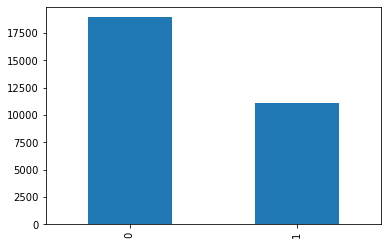

In [11]:
df['is_duplicate'].value_counts().plot(kind='bar')

In [12]:
# repeated question
qid=pd.Series(df['qid1'].tolist()+df['qid2'].tolist())
qid

0        194146
1        130462
2        123722
3        182175
4         76932
          ...  
59995    536613
59996    293749
59997    537136
59998    140812
59999    226388
Length: 60000, dtype: int64

In [13]:
duplicate=qid.value_counts()>1
duplicate

2559       True
7801       True
30782      True
18296      True
3595       True
          ...  
439834    False
130649    False
71432     False
10877     False
226388    False
Length: 55288, dtype: bool

In [14]:
duplicate[duplicate]

2559      True
7801      True
30782     True
18296     True
3595      True
          ... 
42893     True
126744    True
985       True
95894     True
59303     True
Length: 3506, dtype: bool

In [15]:
duplicate[duplicate].shape #duplicate question

(3506,)

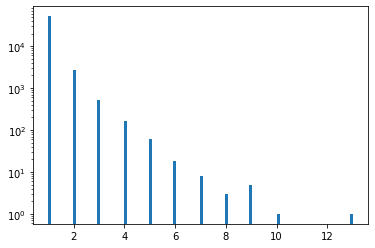

In [16]:
#how many time question is repeate
plt.hist(qid.value_counts().values,bins=100)
plt.yscale('log')
plt.show()

In [17]:
qid.value_counts()

2559      13
7801      10
30782      9
18296      9
3595       9
          ..
439834     1
130649     1
71432      1
10877      1
226388     1
Length: 55288, dtype: int64

In [18]:
qid.value_counts().values

array([13, 10,  9, ...,  1,  1,  1], dtype=int64)

# -------------------------------------------------------------

# Approch 1 (BOW)

In [19]:
#let do below approch and check either its work or not
#convert qid1 and qid2 into BOW and traing this model on random forest

In [20]:
ques_df=df[['question1','question2']] #remove colums which is not needed
ques_df.head()

,question1,question2
340368,How do you impress an interviewer?,How do you impress a technical interviewer?
76303,Is it safe to use data recovery software?,Is H-Data recovery software useful?
71947,Has anyone attended the Jaisalmer Lurm Festiva...,What are some useful tips for spooling in Oracle?
111184,Is it possible to switch real estate agents as...,When does it make sense to sell your home with...
42714,Which is better Java or python?,Is it possible to create Android apps with Pyt...


In [21]:
from sklearn.feature_extraction.text import CountVectorizer
#merge texts 
questions=list(ques_df['question1'])+list(ques_df['question2'])

cv =CountVectorizer(max_features=3000)#most used 3000 words
q1_arr,q2_arr=np.vsplit(cv.fit_transform(questions).toarray(),2)

In [22]:
temp_df1=pd.DataFrame(q1_arr,index=ques_df.index)
temp_df2=pd.DataFrame(q2_arr,index=ques_df.index)
temp_df=pd.concat([temp_df1,temp_df2],axis=1)
temp_df.shape

(30000, 6000)

In [23]:
temp_df

,0,1,2,3,4,5,6,7,8,9,...,2990,2991,2992,2993,2994,2995,2996,2997,2998,2999
340368,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
76303,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
71947,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
111184,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
42714,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
403055,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
193751,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
403547,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
265106,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [24]:
temp_df['is_duplicate']=df['is_duplicate']

In [25]:
temp_df.head()

,0,1,2,3,4,5,6,7,8,9,...,2991,2992,2993,2994,2995,2996,2997,2998,2999,is_duplicate
340368,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
76303,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
71947,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
111184,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
42714,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [26]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(temp_df.iloc[:,0:-1].values,temp_df.iloc[:,-1].values,test_size=0.2,random_state=0)

In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)
accuracy_score(y_test,y_pred)

0.7403333333333333

In [28]:
from xgboost import XGBClassifier
xgb=XGBClassifier()
xgb.fit(x_train,y_train)
y_pred=xgb.predict(x_test)
accuracy_score(y_test,y_pred)

0.72

# --------------------------------------------------------------------------------------------

# Approch 2

In [29]:
#for second approch let add some freature
#char and word len of both question
#common words
#total words
#share words=common words/total words

In [30]:
#freature engineering
df['q1_len']=df['question1'].str.len()
df['q2_len']=df['question2'].str.len()

In [31]:
df['q1_num_words']=df['question1'].apply(lambda x:len(x.split(" ")))
df['q2_num_words']=df['question2'].apply(lambda x:len(x.split(" ")))

In [32]:
str="I am poor but I want to invest."
list(map(lambda word: word.lower().strip(), str.split(" ")))

['i', 'am', 'poor', 'but', 'i', 'want', 'to', 'invest.']

In [33]:
set(list(map(lambda word: word.lower().strip(), str.split(" "))))

{'am', 'but', 'i', 'invest.', 'poor', 'to', 'want'}

In [34]:
def common_words(row):
    w1=set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
    w2=set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))    
    return len(w1 & w2)

In [35]:
df['word_common']=df.apply(common_words,axis=1)

In [36]:
def total_words(row):
    w1=set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
    w2=set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))    
    return (len(w1)+len(w2))

In [37]:
df['word_total']=df.apply(total_words,axis=1)

In [38]:
df['word_share']=round((df['word_common']/df['word_total']),2)

In [39]:
#EDA

minimum characters 9
maximum characters 370
average num of characters 59


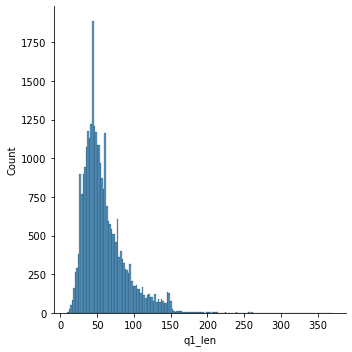

In [40]:
sns.displot(df['q1_len'])
print('minimum characters',df['q1_len'].min())
print('maximum characters',df['q1_len'].max())
print('average num of characters',int(df['q1_len'].mean()))


minimum characters 11
maximum characters 1169
average num of characters 60


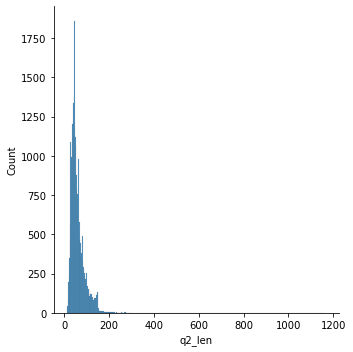

In [41]:
sns.displot(df['q2_len'])
print('minimum characters',df['q2_len'].min())
print('maximum characters',df['q2_len'].max())
print('average num of characters',int(df['q2_len'].mean()))

minimum words 2
maximum words 68
average num of words 10


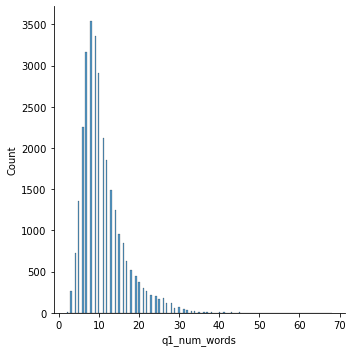

In [42]:
sns.displot(df['q1_num_words'])
print('minimum words',df['q1_num_words'].min())
print('maximum words',df['q1_num_words'].max())
print('average num of words',int(df['q1_num_words'].mean()))

minimum words 2
maximum words 228
average num of words 11


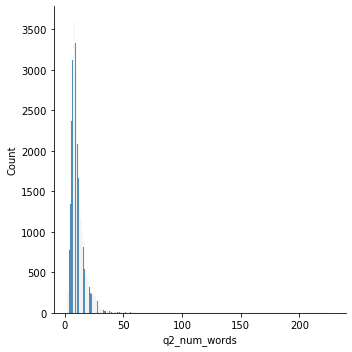

In [43]:
sns.displot(df['q2_num_words'])
print('minimum words',df['q2_num_words'].min())
print('maximum words',df['q2_num_words'].max())
print('average num of words',int(df['q2_num_words'].mean()))

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


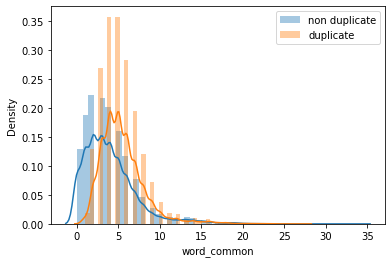

In [44]:
# common words
sns.distplot(df[df['is_duplicate'] == 0]['word_common'],label='non duplicate')
sns.distplot(df[df['is_duplicate'] == 1]['word_common'],label='duplicate')
plt.legend()
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


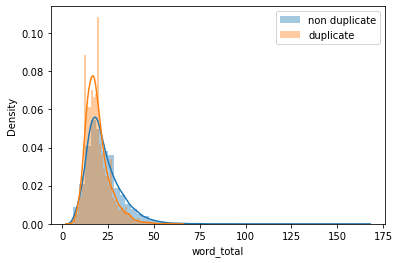

In [45]:
# total words
sns.distplot(df[df['is_duplicate'] == 0]['word_total'],label='non duplicate')
sns.distplot(df[df['is_duplicate'] == 1]['word_total'],label='duplicate')
plt.legend()
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


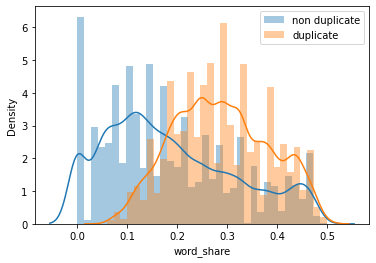

In [46]:
# word share
sns.distplot(df[df['is_duplicate'] == 0]['word_share'],label='non duplicate')
sns.distplot(df[df['is_duplicate'] == 1]['word_share'],label='duplicate')
plt.legend()
plt.show()

In [47]:
ques_df = df[['question1','question2']]
ques_df.head()

,question1,question2
340368,How do you impress an interviewer?,How do you impress a technical interviewer?
76303,Is it safe to use data recovery software?,Is H-Data recovery software useful?
71947,Has anyone attended the Jaisalmer Lurm Festiva...,What are some useful tips for spooling in Oracle?
111184,Is it possible to switch real estate agents as...,When does it make sense to sell your home with...
42714,Which is better Java or python?,Is it possible to create Android apps with Pyt...


In [48]:
final_df = df.drop(columns=['id','qid1','qid2','question1','question2'])
print(final_df.shape)
final_df.head()

(30000, 8)


,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share
340368,1,34,43,6,7,5,13,0.38
76303,0,41,35,8,5,2,13,0.15
71947,0,59,49,10,9,0,19,0.00
111184,0,138,70,26,14,6,38,0.16
42714,0,31,141,6,27,1,24,0.04


In [49]:
from sklearn.feature_extraction.text import CountVectorizer
# merge texts
questions = list(ques_df['question1']) + list(ques_df['question2'])

cv = CountVectorizer(max_features=3000)
q1_arr, q2_arr = np.vsplit(cv.fit_transform(questions).toarray(),2)

In [50]:
temp_df1 = pd.DataFrame(q1_arr, index= ques_df.index)
temp_df2 = pd.DataFrame(q2_arr, index= ques_df.index)
temp_df = pd.concat([temp_df1, temp_df2], axis=1)
temp_df.shape

(30000, 6000)

In [51]:
final_df = pd.concat([final_df, temp_df], axis=1)
print(final_df.shape)
final_df.head()

(30000, 6008)


,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share,0,1,...,2990,2991,2992,2993,2994,2995,2996,2997,2998,2999
340368,1,34,43,6,7,5,13,0.38,0,0,...,0,1,0,0,0,0,0,0,0,0
76303,0,41,35,8,5,2,13,0.15,0,0,...,0,0,0,0,0,0,0,0,0,0
71947,0,59,49,10,9,0,19,0.00,0,0,...,0,0,0,0,0,0,0,0,0,0
111184,0,138,70,26,14,6,38,0.16,0,0,...,0,0,0,0,1,0,0,0,0,0
42714,0,31,141,6,27,1,24,0.04,0,0,...,0,0,0,0,0,0,0,0,0,0


In [52]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(final_df.iloc[:,1:].values,final_df.iloc[:,0].values,test_size=0.2,random_state=1)

In [53]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rf = RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
accuracy_score(y_test,y_pred)

0.755

In [54]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train,y_train)
y_pred = xgb.predict(X_test)
accuracy_score(y_test,y_pred)

0.754

In [55]:
# Advanced Features
# 1. Token Features
# cwc_min: This is the ratio of the number of common words to the length of the smaller question
# cwc_max: This is the ratio of the number of common words to the length of the larger question
# csc_min: This is the ratio of the number of common stop words to the smaller stop word count among the two questions
# csc_max: This is the ratio of the number of common stop words to the larger stop word count among the two questions
# ctc_min: This is the ratio of the number of common tokens to the smaller token count among the two questions
# ctc_max: This is the ratio of the number of common tokens to the larger token count among the two questions
# last_word_eq: 1 if the last word in the two questions is same, 0 otherwise
# first_word_eq: 1 if the first word in the two questions is same, 0 otherwise
# 2. Length Based Features
# mean_len: Mean of the length of the two questions (number of words)
# abs_len_diff: Absolute difference between the length of the two questions (number of words)
# longest_substr_ratio: Ratio of the length of the longest substring among the two questions to the length of the smaller question
#     3. Fuzzy Features
# fuzz_ratio: fuzz_ratio score from fuzzywuzzy
# fuzz_partial_ratio: fuzz_partial_ratio from fuzzywuzzy
# token_sort_ratio: token_sort_ratio from fuzzywuzzy
# token_set_ratio: token_set_ratio from fuzzywuzzy

In [56]:
#increase data
#preprocessing stamming
#apply more algo ->svm logistic, hyperparameter tuning,cross validation
#more features
#Bag of word , tfidf, w2v, tfidf weight w2v(code in link)#w2v gives good result
#Deep learning-> Lstm, transfermers like BERT
#deep learning solve problem of loding big data (because it has inbuild libraries)
#use popabality(soft) insted of hard threshold use log loss